_Pablo Latorre and Hafid Laayouni_

You need to install the following Python packages: _pandas, numpy, scipy, statsmodels, matplotlib and pingouin._

You can do it in Linux, for instance, with [pip installer](https://pip.pypa.io/en/stable/installing/) by typing the following command in the terminal:

__sudo pip install pandas numpy statsmodels scipy matplotlib pingouin__

Then, you have to import in Python the following packages:

In [1]:
# loading required functions and modules #
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg

Besides, at the end of this document there is a **Functions' guide** section with practical information about some of the functions used in this session.

# Introduction to One-way Analysis of Variance

## Definition

The one-way analysis of variance (ANOVA) is used to compare several groups of a quantitative variable.
Specifically, it is a way to calculate if there are any statistically significant differences between the means of
three or more independent groups. It tests the following null hypothesis:
\begin{equation*}
H_0: \mu_1 = \mu_2 = \mu_3 = ... = \mu_a
\end{equation*}
Where $\mu =$ group mean and $a =$ number of groups.

In the case that the one-way ANOVA returns a significant result, the alternative hypothesis ($H_A$) is accepted,
meaning that at least two group means are statistically different. However, the ANOVA statistic will not tell
you which are the significantly different groups, for that we will need a post hoc test.

## Assumptions

In order to use the ANOVA test statistic, three main assumptions must be satisfied:

* The dependent variable is normally distributed in each group.

* There is homogeneity of variances, the population variances in each group are equal.

* Independence of observations.

## Example

Let’s work with the following simple example:


In [2]:
# dictionary with type of fertilizer as key and array of production as values
values = {'fertilizer1' : [6.27,5.36,6.39,4.85,5.99,7.14,5.08,4.07,4.35,4.95],
'fertilizer2' : [3.07,3.29,4.04,4.19,3.41,3.75,4.87,3.94,6.28,3.15],
'fertilizer3' : [4.04,3.79,4.56,4.55,4.55,4.53,3.53,3.71,7.00,4.61]}
# create panda dataframe
data = pd.DataFrame(values)
data

,fertilizer1,fertilizer2,fertilizer3
0,6.27,3.07,4.04
1,5.36,3.29,3.79
2,6.39,4.04,4.56
3,4.85,4.19,4.55
4,5.99,3.41,4.55
5,7.14,3.75,4.53
6,5.08,4.87,3.53
7,4.07,3.94,3.71
8,4.35,6.28,7.00
9,4.95,3.15,4.61


The data represents the production of pumpkins of plots that received treatments with different fertilizers.
The question we ask ourselves here is: does the fertilizer have an effect on the pumpkin production?
To answer this question, we could use one-way ANOVA.


# The ANOVA Python function
First, we need a special format of the data to work with Python, it is called long-format data. We will import it from the file *fertilizer_long_format.txt*

In [3]:
fertilizer_data = pd.read_table("fertilizer_long_format.txt", sep=' ')
fertilizer_data.head()

,fertilizer,production
0,fertilizer1,6.27
1,fertilizer1,5.36
2,fertilizer1,6.39
3,fertilizer1,4.85
4,fertilizer1,5.99


Before performing one-way ANOVA, let’s check normality and homogeneity of variance assumptions.


**HINT**: To check normality we can use the statistical test Kolmogorov-Smirnov (*stats.kstest()* function)

In [4]:
prod_mean = np.mean(fertilizer_data['production'])
prod_sd = np.std(fertilizer_data['production'], ddof = 1)
stats.kstest(fertilizer_data['production'], 'norm', args = (prod_mean, prod_sd))

KstestResult(statistic=0.1453124706703378, pvalue=0.5049329274179539)


**HINT:** To test for homogeneity of variance, we can use Levene test. You could use *stats.levene()* function.

In [5]:
# Note that for this test we are using data instead of fertilizer_data
# we do so for convenience with function input
stats.levene(data['fertilizer1'], data['fertilizer2'], data['fertilizer3'])

LeveneResult(statistic=0.25557357081718185, pvalue=0.7763246395092929)

Now, let's perform one-way ANOVA. 


**HINT:** You can use the Python functions *ols()* and *anova_lm()*:

In [6]:
mod = ols('production ~ fertilizer',
                data=fertilizer_data).fit()
      
aov_table = sm.stats.anova_lm(mod)
fvalue = aov_table['F'][0] # store f-value for downstream analyzes

aov_table

,df,sum_sq,mean_sq,F,PR(>F)
fertilizer,2.0,10.822747,5.411373,5.702374,0.008594
Residual,27.0,25.622150,0.948969,NaN,NaN


The output of *anova_lm* function is a table where you will find in the first column the degrees of freedom of
SS between (a-1) and SS within (an-a). In the second column: the SS between (first row) and
SS within (also called Residual). In the fourth column you will see the F-statistic and in the fifth the p-value.

# Post hoc test after a significant result

Once a significant result is obtained with the one-way ANOVA, we can only say that at least one population mean is different from at least one other population mean. Now, we will learn how to know which is the population mean that is different from the others.
For that we will use *pairwise t-tests* with Bonferroni p-adjustment. 


**HINT**: You could use *pg.pairwise_ttests()* function.

In [7]:
pg.pairwise_ttests(data = fertilizer_data, dv = 'production', 
                   between = 'fertilizer', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,fertilizer,fertilizer1,fertilizer2,False,True,3.320116,18.0,two-sided,0.003808,0.011425,bonf,10.622,1.422063
1,fertilizer,fertilizer1,fertilizer3,False,True,2.196297,18.0,two-sided,0.041413,0.124239,bonf,1.926,0.940712
2,fertilizer,fertilizer2,fertilizer3,False,True,-1.121212,18.0,two-sided,0.276934,0.830801,bonf,0.615,-0.480235


What can we conclude after the pairwise t-test?

# Exercise 1. Randomization test

If the assumptions of ANOVA were not applicable, it would be a good solution to perform a randomization test for the anova, as we already did for t-student.



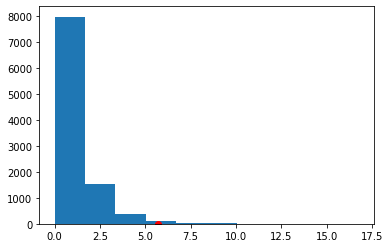

In [8]:
nReplicates = 10000

def randomTest(fertilizer_data):
    # Random sample of size 30 extracted from production variable
    p1 = np.random.choice(fertilizer_data['production'], size = 30)
    fertilizer_random = pd.DataFrame({'production': p1, 
                                      'fertilizer': fertilizer_data['fertilizer']})
    mod = ols('production ~ fertilizer',
                data=fertilizer_random).fit()
      
    aov_table = sm.stats.anova_lm(mod)
    fval = aov_table['F'][0]
    return(fval)
    
fSamples = np.array([])

for _ in range(nReplicates):
    fval = randomTest(fertilizer_data)
    fSamples = np.append(fSamples, fval)

plt.hist(fSamples)
plt.plot(fvalue, 0, 'ro')
plt.show()

In [9]:
signif = fSamples[fSamples >= fvalue]
len(signif) / nReplicates

0.0104

Another solution would be to transform the dependent variable to rank and run the anova as usual, this will be equivalent to a non parametric test.


**HINT**: You can use rank() function to rank a variable

In [10]:
fertilizer_data['rank'] = fertilizer_data['production'].rank()

mod_rank = ols('rank ~ fertilizer',
                data=fertilizer_data).fit()
      
aov_table_rank = sm.stats.anova_lm(mod_rank)

aov_table_rank

,df,sum_sq,mean_sq,F,PR(>F)
fertilizer,2.0,819.95,409.975000,7.759507,0.002175
Residual,27.0,1426.55,52.835185,NaN,NaN


# Exercise 2. To be delivered

Medley and Clements (1998) investigated the impact of zinc contamination (and other heavy metals) on the
diversity of diatom species in the USA Rocky Mountains. The diversity of diatoms (number of species) and
degree of zinc contamination (categorized as either of high, medium, low or natural background level) were
recorded from between four and six sampling stations within each of six streams known to be polluted. These
data were used to test the null hypothesis that there were no differences the diversity of diatoms between
different zinc levels. You can find the data in the contamination.txt file.
Assess normality/homogeneity of variance using a boxplot of species diversity against zinc group. Test the $H_0$
that the population group means are all equal and perform the analysis of variance of species diversity versus
zinc-level groups. What is your conclusion?
Perform post-hoc test to investigate pairwise mean differences between all groups.


# Functions' guide

Here you can find a brief help section for the most relevant functions and arguments used through the session. For detailled information about specific functions and extra functionalities remember that you can check the manual of a function by typing *help(your_function)* or just using Google. 

* **pd.read_table(data, sep = ' ')**

    Read general delimited file into DataFrame.

    sep = ' ' In this data frame we don't have the default tabulator separating the data columns. Instead, we have a whitespace, so we have to specify it to the the function via this argument.
    
* **stats.kstest(data, 'norm', args = (mean, sd))**

    Performs the one sample Kolmogorov-Smirnov test for goodness of fit.
    
    We specify we want to test our data against a normal distribution with 'norm' argument. In addition, we specify we want that normal distribution to have a given mean and standard deviation with args = ().
    
    
* **stats.levene(group1, group2, group3, ...)**

    Perform Levene test for equal variances.
    
    You just need to provide separately the data of the groups you are testing for.
    
    
* **ols('variable1 ~ variable2', data=data).fit()**

    Create a model from a formula and dataframe

    *variable1 ~ variable2* is the notation expected from the function.  It specifies that variable1 is the dependent variable and variable2 the independent variable. These variables should be present as columns of your data (long format data).
    
    *ols()* function creates the model and *fit()* is for fitting it.     
    

* **sm.stats.anova_lm(mod)**

    Anova table for one or more fitted linear models
    
    mod is the fitted model created with the *ols().fit()* functions
    

* **pg.pairwise_ttests(data, dv = continous_variable_name,** 
    **between = categorical_variable_name, padjust = 'bonf')**

    Pairwise T-tests.

    Tests for multiple comparisons. In this case, we are using pairwise t-test.
    
    dv specifies the continuos variable (pumpkin production in this case)
    
    between refers to to categorial variable (type of fertilizer in this case)
    
    padjust indicates the type of multiple testing correction we want to use. In this case we want bonferroni. Other options are, for example, 'holm' or 'fdr_bh'